# ДЗ_07

## Задание 1

Сделайте краткий обзор какой-нибудь научной работы посвященной тому или иному алгоритму для object detection, который не рассматривался на уроке. Проведите анализ: Чем отличается выбранная вами на рассмотрение архитектура нейронной сети от других архитектур? В чем плюсы и минусы данной архитектуры? Какие могут возникнуть трудности при применении данной архитектуры на практике?

## Наиболее актуальным материалом является обзор: Image Segmentation Using Deep Learning: A Survey, опубликованный 10.04.2020

https://arxiv.org/pdf/2001.05566.pdf

## 2 Глубокие нейронные сети
### 2.1 Свёрточные нейронные сети CNN
Реализации: AlexNet, VGGNet, ResNet, GoogLeNet, MobileNet , DenseNet

Основное вычислительное преимущество CNNs заключается значительно меньшем количестве параметров, чем полностью связанных нейронных сетях

### 2.2 Рекурентные нейронные сети RNN и LSTM

Применяются для обработки текста и временных рядов. Используют принцип обратной связи.

Архитектура Long Short Term Memory (LSTM) устойчива к зрадиентному взрыву и затуханию.

### 2.3 Encoder-Decoder и автокодировщики

Применяются для преобразования изображений и в обработке естественного языка (NLP).
Реализации: автокодировщик шумоподавления (SDAE), вариационный автокодировщик (VAE)

### 2.4 Генеративные состязательные сети (GAN)

### 2.5 Перенос обучения

Использование вложенных предобученных моделей для снижения сложности.

## 3 Модели сегментации изображений на принципах глубокого обучения

### 3.1 Полностью сверточные сети (FCN)

Основана на архитектуре CNN (VGG16 и GoogLeNet), но содержит только свёрточные слои. Выдаёт карту сегментации вместо классификации. Характеризуется высокой производительностью, но недостаточной для обработки в реальном времени. Развитие FCN - ParseNet.

### 3.2 Сверточные модели с графическими моделями

Алгоритм семантической сегментации.ритм, основанный на сочетании CNN и полностью связанных CRF. Чтобы преодолеть плохое свойство локализации глубоких CNN, объединили ответы на последнем слое CNN с полностью подключенным CRF. Модель способна локализовать границы сегментов с более высокой точностью, чем это было возможно с помощью предыдущих методов.

### 3.3 Encoder-Decoder модели

#### 3.3.1 Encoder-Decoder модели для общей сегментации

__SegNet__

Ядро обучаемого механизма сегментации SegNet состоит из сети кодировщиков, которая топологически идентична 13 сверточным слоям в сети VGG16, и соответствующей сети декодеров, за которой следует пиксельный слой классификации. SegNet значительно меньше по количеству обучаемых параметров, чем другие конкурирующие архитектуры.

__HRNet__

Hornet состоит из параллельных потоков свертки высокого и низкого разрешения с повторным обменом информацией через пары с несколькими разрешениями. Четыре этапа. 1-й этап состоит из сверток высокого разрешения. 2-й (3-й, 4-й) этап повторяет блоки с двумя разрешениями (три разрешения, четыре разрешения).

#### 3.3.2 Encoder-Decoder модели для сегментации медицинских и биомедицинских изображений

__U-Net__

Архитектура U-Net состоит из двух частей: сокращающегося пути для захвата контекста и симметричного расширяющегося пути, обеспечивающего точную локализацию. Часть с понижающей дискретизацией или сужением имеет архитектуру, подобную FCN, которая извлекает признаки с помощью сверток 3×3. В части с повышающей дискретизацией или расширением используется повышающая свертка (или деконволюция), уменьшая количество карт функций при увеличении их размеров. Карты характеристик из части сети с понижающей дискретизацией копируются в часть с повышающей дискретизацией, чтобы избежать потери информации о паттернах. Наконец, свертка 1×1 обрабатывает карты признаков для создания карты сегментации, которая классифицирует каждый пиксель входного изображения.

__V-Net (для сегментации 3D медицинских изображений)__

Для обучения модели ввели новую целевую функцию, основанную на коэффициенте Дайса, позволяющую модели справляться с ситуациями, в которых существует сильный дисбаланс между количеством вокселей на переднем и заднем плане.

### 3.4 Модели на основе многомасштабных и пирамидальных сетей

- Feature Pyramid Network (FPN)
- Pyramid Scene Parsing Network (PSPN)

### 3.5 Модели на основе R-CNN

R-CNN и ее расширения (Fast R-CNN, Faster R-CNN, Mask-RCNN)

Модель Mask R-CNN эффективно обнаруживает объекты на изображении, одновременно создавая высококачественную маску сегментации для каждого экземпляра. Модель Mask R-CNN по сути является более быстрой RCNN с 3 выходными ветвями: первая вычисляет координаты ограничивающего прямоугольника, вторая вычисляет связанные классы, а третья вычисляет двоичную маску для сегментации объекта. Функция потерь Mask R-CNN объединяет потери координат ограничивающего прямоугольника, прогнозируемого класса и маски сегментации и обучает их все вместе.

- Path Aggregation Network (PANet)
- MaskLab
- Tensormask

### 3.6 Расширенные сверточные модели и семейство DeepLab

Вводят параметр сверточных слоев - скорость расширения. Например, ядро 3 × 3 со скоростью расширения 2 будет иметь принимающее поле того же размера, что и ядро 5 × 5, при использовании только 9 параметров, таким образом увеличивая воспринимающее поле без увеличения вычислительных затрат. Расширенные свертки были популярны в области сегментации в реальном времени.

### 3.7 Модели на основе рекуррентных нейронных сетей

RNN полезны при моделировании краткосрочных / долгосрочных зависимостей между пикселями, чтобы (потенциально) улучшить оценку карты сегментации. Используя RNN, пиксели могут быть связаны друг с другом и последовательно обрабатываться для моделирования глобальных контекстов и улучшения семантической сегментации.

- ReSeg
- 2D-LSTM
- Graph Long Short-Term Memory (Graph LSTM)
- Data Associated Recurrent Neural Networks (DA-RNNs)

### 3.8 Модели, основанные на внимании

- OCNet
- EMANet
- CCNet
- DFN

### 3.9 Генеративные модели и состязательное обучение

Принцип состоит в обучении сверточной семантической сети сегментации и состязательной сети, которая различает карты сегментации на основе истинности от тех, которые генерируются сетью сегментации. Состязательный подход к обучению приводит к повышению точности.

### 3.10 CNN модили с Active Contour моделями

- Deep Structured Active Contours (DSAC)
- Deep Active Ray Network (DarNet)
- Deep Convolutional Active Contours (DCAC)

## 4 Датасеты сегментации изображений

Датасеты разделены на 3 категории - 2D-изображения, 2.5 D-изображения RGB-D (цвет + глубина) и 3D-изображения.

### 2D датасеты

- PASCAL Visual Object Classes (VOC)
- PASCAL Context
- Microsoft Common Objects in Context (MS COCO)
- Cityscapes
- ADE20K /MIT Scene Parsing (SceneParse150)
- SiftFlow
- Stanford background
- Berkeley Segmentation Dataset (BSD)
- Youtube-Objects
- KITTI

### 2.5D датасеты

- NYU-D V2
- SUN-3D
- SUN RGB-D
- UW RGB-D Object Dataset
- ScanNet

### 3D датасеты

- Stanford 2D-3D
- ShapeNet Core
- Sydney Urban Objects Dataset

## 5 Обзор производительности

### 5.1 Метрики для моделей сегментации

- Pixel accuracy (PA) находит соотношение правильно классифицированных пикселей, деленное на общее количество пикселей.
- Mean Pixel Accuracy (MPA) расширенная версия PA, в которой соотношение правильных пикселей вычисляется для каждого класса, а затем усредняется по общему количеству классов.
- Intersection over Union (IoU) или индекс Jaccard'а наиболее часто используемых показателей в семантической сегментации определяется как область пересечения между прогнозируемой картой сегментации и наземной истинностью, деленная на площадь объединения между прогнозируемой картой сегментации и истинной.
- Mean-IoU определяется как среднее значение IoU по всем классам.
- Precision / Recall / F1 score. Precision и Recall могут быть определены для каждого класса, а также на агрегированном уровне. F1 определяется как среднее гармоническое значение Precision и Recall.
- Коэффициент Дайса можно определить как удвоенную площадь перекрытия предсказанных и истинностных карт, деленную на общее количество пикселей в обоих изображениях. Коэффициент Дайса очень похож на IoU. При применении к логическим данным (например, картам бинарной сегментации) и обращении к переднему плану как к положительному классу, коэффициент Дайса по существу идентичен F1.




In [ ]:
from google.colab import files
files.upload()

In [ ]:
from zipfile import ZipFile
zip_file = ZipFile('Scr (1).zip')
zip_file.extractall()
#!ls -la

In [ ]:
# import cv2
# import numpy as np
# from matplotlib import pyplot as plt

# img = cv2.imread("tab1.jpg")
# img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img_cvt)
# plt.show()

## Задание 2

__Попробую TensorFlow Object Detection API на примере: Object Detection API Demo__

### Импорты

In [ ]:
# !pip install -U --pre tensorflow=="2.*"
# !pip install tf_slim

In [ ]:
# !pip install pycocotools

In [ ]:
import os
import pathlib

if "models" in pathlib.Path.cwd().parts:
    while "models" in pathlib.Path.cwd().parts:
        os.chdir('..')
elif not pathlib.Path('models').exists():
    !git clone --depth 1 https://github.com/tensorflow/models

In [ ]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.

In [ ]:
%%bash
cd models/research
pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1577697 sha256=e575cfba475bb390cc1e21531bff9dd8f2b61764d4e5d5b429d4d95e82bbe0de
  Stored in directory: /tmp/pip-ephem-wheel-cache-posv5158/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection
  Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

In [ ]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [ ]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

### Используем модель: SSD with Mobilenet

In [ ]:
def load_model(model_name):
    base_url = 'http://download.tensorflow.org/models/object_detection/'
    model_file = model_name + '.tar.gz'
    model_dir = tf.keras.utils.get_file(
        fname=model_name,
        origin=base_url + model_file,
        untar=True)

    model_dir = pathlib.Path(model_dir)/"saved_model"

    model = tf.saved_model.load(str(model_dir))

    return model

In [ ]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [ ]:
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = pathlib.Path('models/research/object_detection/test_images')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))
TEST_IMAGE_PATHS

[PosixPath('models/research/object_detection/test_images/image1.jpg'),
 PosixPath('models/research/object_detection/test_images/image2.jpg')]

In [ ]:
model_name = 'ssd_mobilenet_v1_coco_2017_11_17'
detection_model = load_model(model_name)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
print(detection_model.signatures['serving_default'].inputs)

[<tf.Tensor 'image_tensor:0' shape=(None, None, None, 3) dtype=uint8>]


In [ ]:
detection_model.signatures['serving_default'].output_dtypes

{'detection_boxes': tf.float32,
 'detection_classes': tf.float32,
 'detection_scores': tf.float32,
 'num_detections': tf.float32}

In [ ]:
detection_model.signatures['serving_default'].output_shapes

{'detection_boxes': TensorShape([None, 100, 4]),
 'detection_classes': TensorShape([None, 100]),
 'detection_scores': TensorShape([None, 100]),
 'num_detections': TensorShape([None])}

In [ ]:
def run_inference_for_single_image(model, image):
    image = np.asarray(image)
    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis,...]

    # Run inference
    model_fn = model.signatures['serving_default']
    output_dict = model_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(output_dict.pop('num_detections'))
    output_dict = {key:value[0, :num_detections].numpy()
                    for key,value in output_dict.items()}
    output_dict['num_detections'] = num_detections

    # detection_classes should be ints.
    output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)

    # Handle models with masks:
    if 'detection_masks' in output_dict:
        # Reframe the the bbox mask to the image size.
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'],
              output_dict['detection_boxes'],
              image.shape[0],
              image.shape[1])
        detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                            tf.uint8)
        output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()

    return output_dict

In [ ]:
def show_inference(model, image_path):
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = np.array(Image.open(image_path))
    # Actual detection.
    output_dict = run_inference_for_single_image(model, image_np)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks_reframed', None),
        use_normalized_coordinates=True,
        line_thickness=8)

    display(Image.fromarray(image_np))
    return output_dict

In [ ]:
def obj_summary(o_d):
    for i in range(o_d['num_detections']):
        if o_d['detection_scores'][i] > 0.2:
            print(f"Объект: {category_index[o_d['detection_classes'][i]]['name']}\tscore: {o_d['detection_scores'][i]:.4f}\tрамка: {o_d['detection_boxes'][i]}")

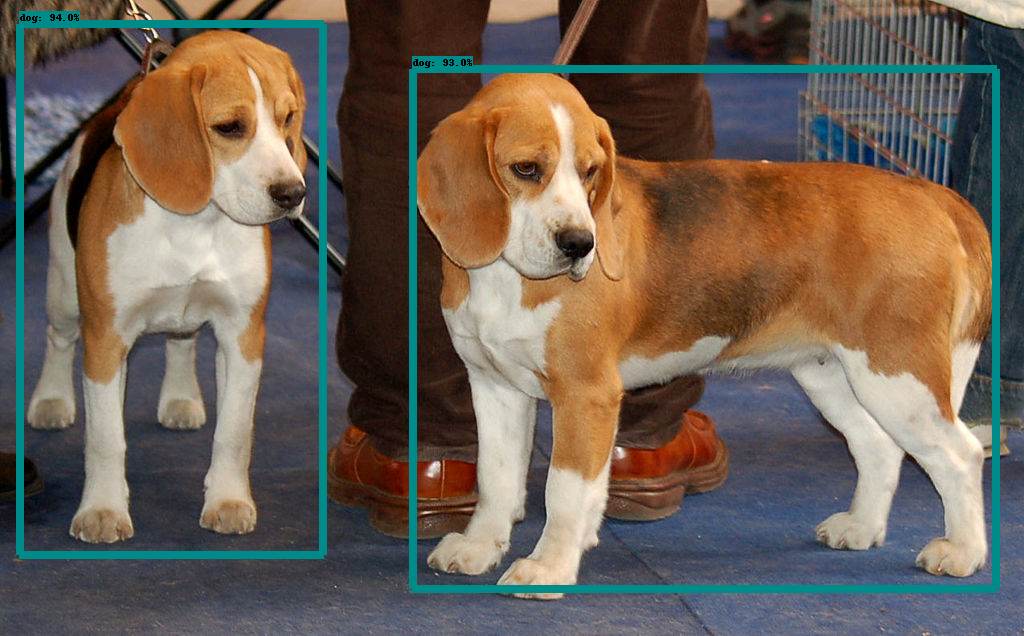

Объект: dog	score: 0.9407	рамка: [0.03908411 0.01921503 0.8721036  0.31577355]
Объект: dog	score: 0.9345	рамка: [0.1095151  0.40283555 0.92464614 0.9730478 ]
Объект: dog	score: 0.2309	рамка: [0.50712377 0.38565153 0.87647957 0.7039409 ]
Объект: dog	score: 0.2252	рамка: [0.06387311 0.28116685 0.91638523 0.8240976 ]


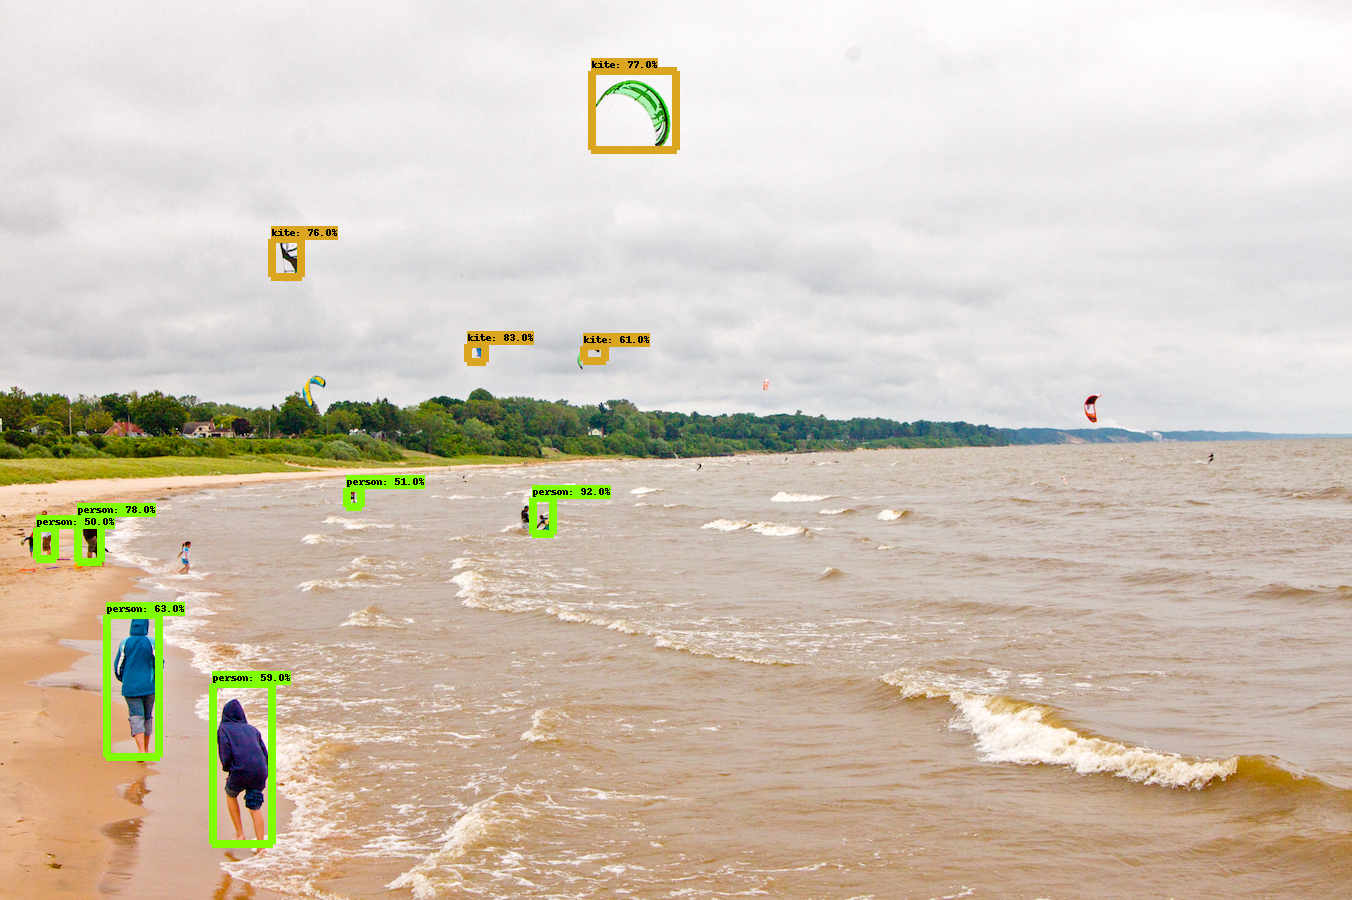

Объект: person	score: 0.9169	рамка: [0.5538768  0.3942238  0.5931247  0.40913767]
Объект: kite	score: 0.8294	рамка: [0.38294643 0.34582412 0.40220094 0.3590299 ]
Объект: person	score: 0.7785	рамка: [0.57416666 0.05766699 0.6233518  0.07475378]
Объект: kite	score: 0.7700	рамка: [0.07991441 0.43740913 0.16590242 0.50060284]
Объект: kite	score: 0.7555	рамка: [0.26564282 0.20112294 0.30753517 0.22309384]
Объект: person	score: 0.6342	рамка: [0.6833808  0.07842994 0.84058815 0.11782577]
Объект: kite	score: 0.6074	рамка: [0.38510028 0.43172216 0.4007325  0.44773054]
Объект: person	score: 0.5891	рамка: [0.76061964 0.15739658 0.9369254  0.20186907]
Объект: person	score: 0.5124	рамка: [0.5428125  0.25604746 0.56234604 0.2674087 ]
Объект: person	score: 0.5015	рамка: [0.5870812  0.02699313 0.620438   0.04133802]
Объект: person	score: 0.4556	рамка: [0.59907246 0.13398448 0.6228148  0.14569616]
Объект: kite	score: 0.4176	рамка: [0.26699692 0.20941132 0.30930108 0.23242617]
Объект: kite	score: 0.2723

In [ ]:
for image_path in TEST_IMAGE_PATHS:
  o_d = show_inference(detection_model, image_path)
  obj_summary(o_d)

In [ ]:
from google.colab import files
files.upload()

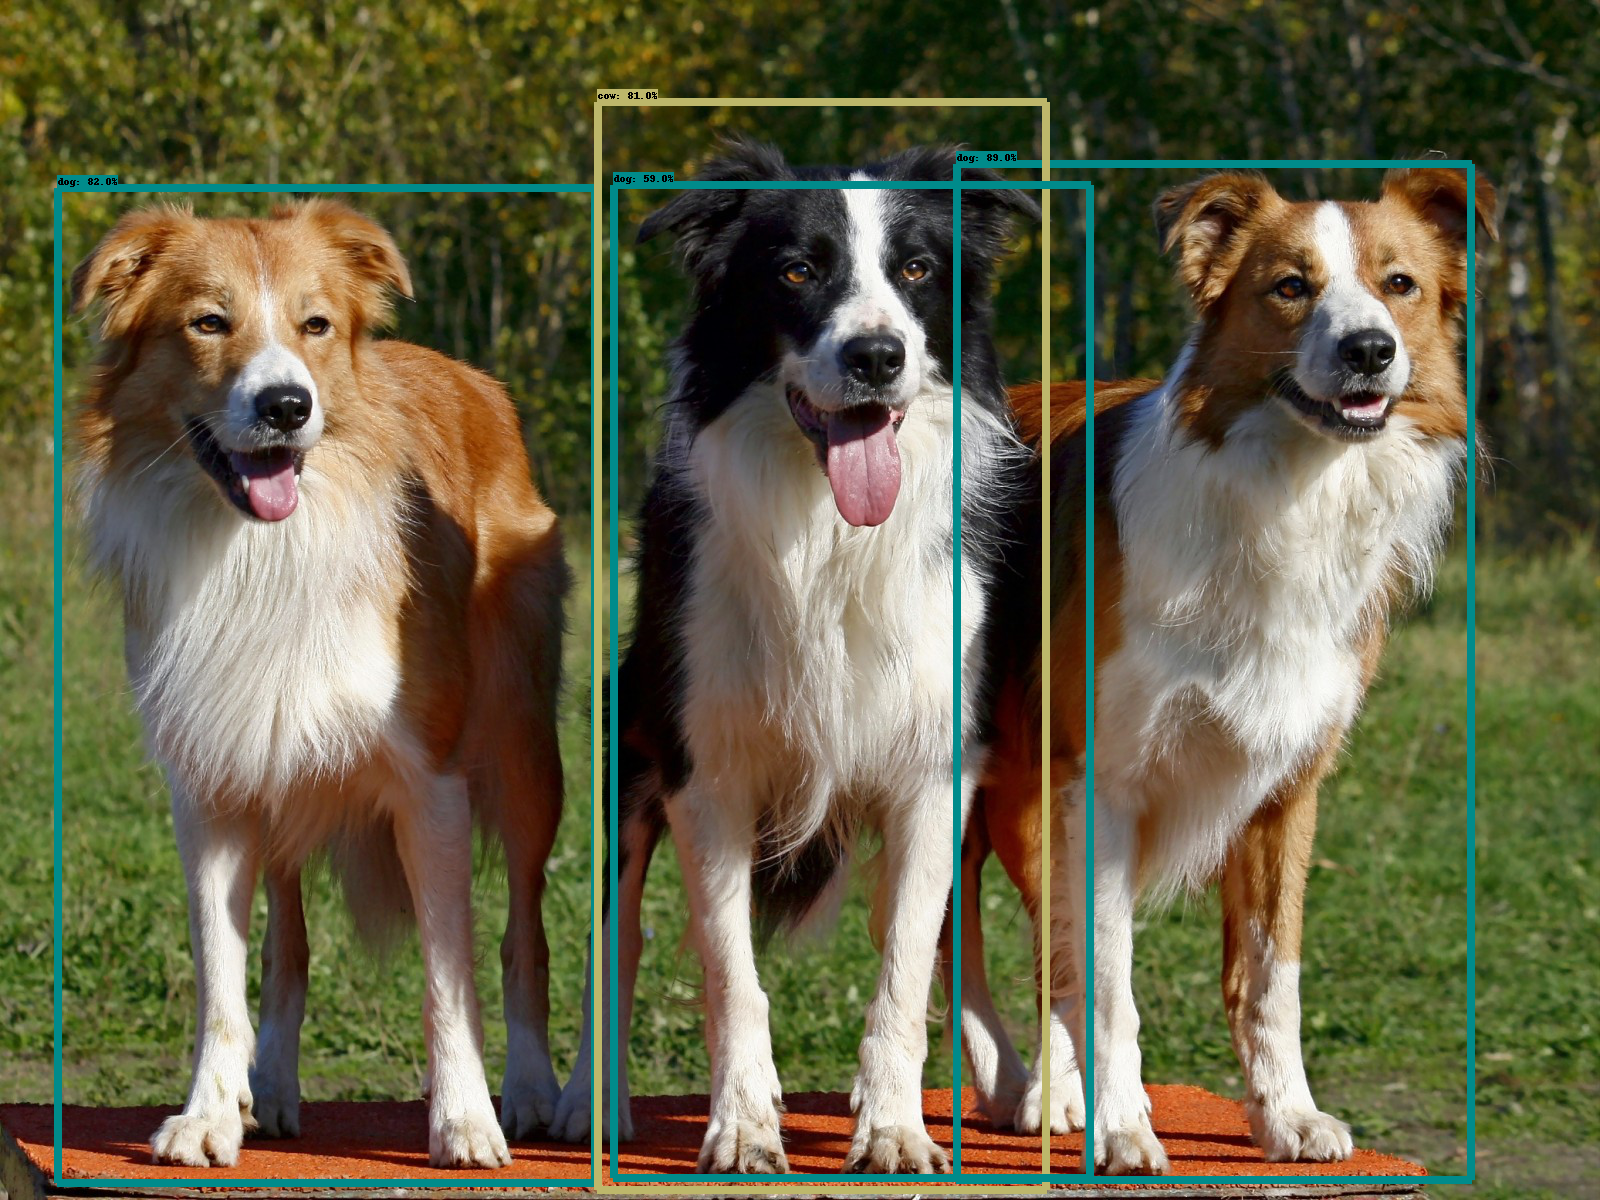

In [ ]:
o_d_1 = show_inference(detection_model, './img_1.jpg')

In [ ]:
obj_summary(o_d_1)

Объект: dog	score: 0.8863	рамка: [0.13708678 0.5978208  0.9825765  0.9195413 ]
Объект: dog	score: 0.8223	рамка: [0.15709016 0.03568031 0.98539054 0.3722126 ]
Объект: cow	score: 0.8137	рамка: [0.08532572 0.37343308 0.9908817  0.6542584 ]
Объект: dog	score: 0.5945	рамка: [0.15424335 0.3835641  0.9809265  0.681324  ]
Объект: cow	score: 0.3346	рамка: [0.09078467 0.57322073 0.97761774 0.9136119 ]
Объект: sheep	score: 0.2094	рамка: [0.15709016 0.03568031 0.98539054 0.3722126 ]


In [ ]:
print(o_d_1)

{'detection_classes': array([18, 18, 21, 18, 21, 20, 20, 21, 21, 18, 18, 21, 25, 18, 21, 19, 25,
       25, 64, 25, 18, 21, 18, 64, 21,  1, 18, 21, 18,  1, 77,  1,  1, 21,
       41, 18, 21, 21, 18,  1, 25, 15, 25, 64, 25, 41, 18, 18, 34, 18, 21,
       18, 21,  1, 41, 15,  1, 21,  1, 64, 64,  1, 20, 21, 15,  1, 25, 20,
        1, 18,  1, 34, 20, 55, 41,  1, 32,  1, 18,  1,  1, 18, 20, 21, 18,
        1, 21, 18, 41, 18, 34, 20, 25, 16, 64, 55, 35, 19, 77, 41]), 'detection_boxes': array([[1.37086779e-01, 5.97820818e-01, 9.82576489e-01, 9.19541299e-01],
       [1.57090157e-01, 3.56803089e-02, 9.85390544e-01, 3.72212589e-01],
       [8.53257179e-02, 3.73433083e-01, 9.90881681e-01, 6.54258370e-01],
       [1.54243350e-01, 3.83564115e-01, 9.80926514e-01, 6.81324005e-01],
       [9.07846689e-02, 5.73220730e-01, 9.77617741e-01, 9.13611889e-01],
       [1.57090157e-01, 3.56803089e-02, 9.85390544e-01, 3.72212589e-01],
       [1.54243350e-01, 3.83564115e-01, 9.80926514e-01, 6.81324005e-01],
    

In [ ]:
category_index

{1: {'id': 1, 'name': 'person'},
 2: {'id': 2, 'name': 'bicycle'},
 3: {'id': 3, 'name': 'car'},
 4: {'id': 4, 'name': 'motorcycle'},
 5: {'id': 5, 'name': 'airplane'},
 6: {'id': 6, 'name': 'bus'},
 7: {'id': 7, 'name': 'train'},
 8: {'id': 8, 'name': 'truck'},
 9: {'id': 9, 'name': 'boat'},
 10: {'id': 10, 'name': 'traffic light'},
 11: {'id': 11, 'name': 'fire hydrant'},
 13: {'id': 13, 'name': 'stop sign'},
 14: {'id': 14, 'name': 'parking meter'},
 15: {'id': 15, 'name': 'bench'},
 16: {'id': 16, 'name': 'bird'},
 17: {'id': 17, 'name': 'cat'},
 18: {'id': 18, 'name': 'dog'},
 19: {'id': 19, 'name': 'horse'},
 20: {'id': 20, 'name': 'sheep'},
 21: {'id': 21, 'name': 'cow'},
 22: {'id': 22, 'name': 'elephant'},
 23: {'id': 23, 'name': 'bear'},
 24: {'id': 24, 'name': 'zebra'},
 25: {'id': 25, 'name': 'giraffe'},
 27: {'id': 27, 'name': 'backpack'},
 28: {'id': 28, 'name': 'umbrella'},
 31: {'id': 31, 'name': 'handbag'},
 32: {'id': 32, 'name': 'tie'},
 33: {'id': 33, 'name': 'suitc

In [ ]:
files.upload()

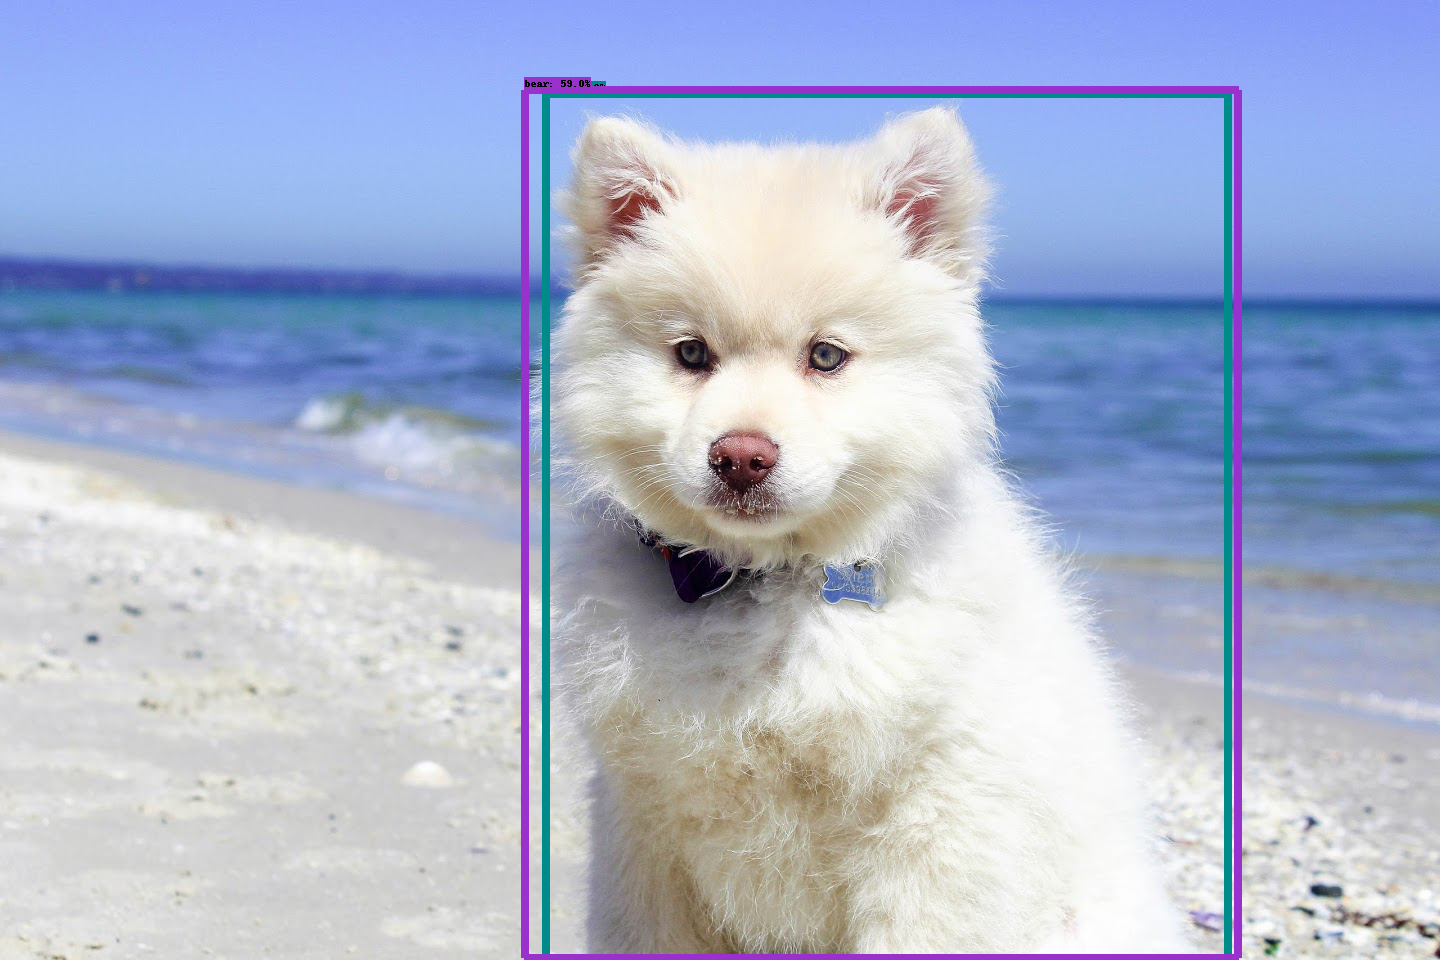

In [ ]:
o_d_2 = show_inference(detection_model, './img_2.jpg')

In [ ]:
obj_summary(o_d_2)

Объект: dog	score: 0.6280	рамка: [0.09835601 0.37867147 1.         0.85288566]
Объект: bear	score: 0.5899	рамка: [0.09477654 0.36449072 0.99787724 0.86010146]


И коровы и овцы и медведь :)